
We have used the Facebook's Detectron for detecting humans. After that we have calculated the distance between every two detection boxes and if any pair of them is less than certain distance we have changed it's colour.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.7.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.8.1+cu101)


In [3]:
!pip install cython pyyaml

In [4]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-o91cgxw9
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-o91cgxw9
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266459 sha256=396cca91632ae387c05db7e0a346c482fc3fc0a084fb8366906d868c43903a97
  Stored in directory: /tmp/pip-ephem-wheel-cache-ofiq5945/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [6]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0+cu101 True


In [7]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
# !pip install detectron2  

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.8MB 4.3MB/s 
     |████████████████████████████████| 2.2MB 14.6MB/s 
     |████████████████████████████████| 276kB 52.6MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=266520 sha256=c18fb121a227f7c84ef82f25ff74020138d8f98f65b500d8a582075997f7e5d7
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201204-cp36-none-any.whl size=44622 sha256=d2fb5e8fcc84ca9530b735f1d1ba79e4a5df9effe380c9269f42dc5f7dc1e195
  Stored in directory: /root/.cache/pip/wheels/b7/c9/47/dc3ce6f67e8cbfb4dec8e9ce981a2aa67b56525d7b91b510af
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=341a161e6bf1be0d8512d4a74ac1d8d2bb2eb4c769315b35cef89a4d6e8a5098
  Stored in directory: /root/.cache/pi

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [2]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
# os.kill(os.getpid(), 9)

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [4]:
!rm -r /content/drive/MyDrive/MiniProject/frames
!mkdir /content/drive/MyDrive/MiniProject/frames
# !cd '/content/drive/MiniProject'

In [ ]:
# here you can provide the path of your custom video feed.
video = "/content/drive/MyDrive/MiniProject/test.mp4"

In [ ]:
cap = cv2.VideoCapture(video)
cnt=0
print(os.getcwd())
os.chdir('/content/drive/MyDrive/MiniProject/frames')
print(os.getcwd())

/content
/content/drive/MyDrive/MiniProject/frames


In [ ]:
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder   
    
    cv2.imwrite(str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==250):
      break

  # Break the loop
  else: 
    break

In [ ]:
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [ ]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

In [ ]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/MiniProject/frames/7.png")

#pass to the model
outputs = predictor(img)

/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


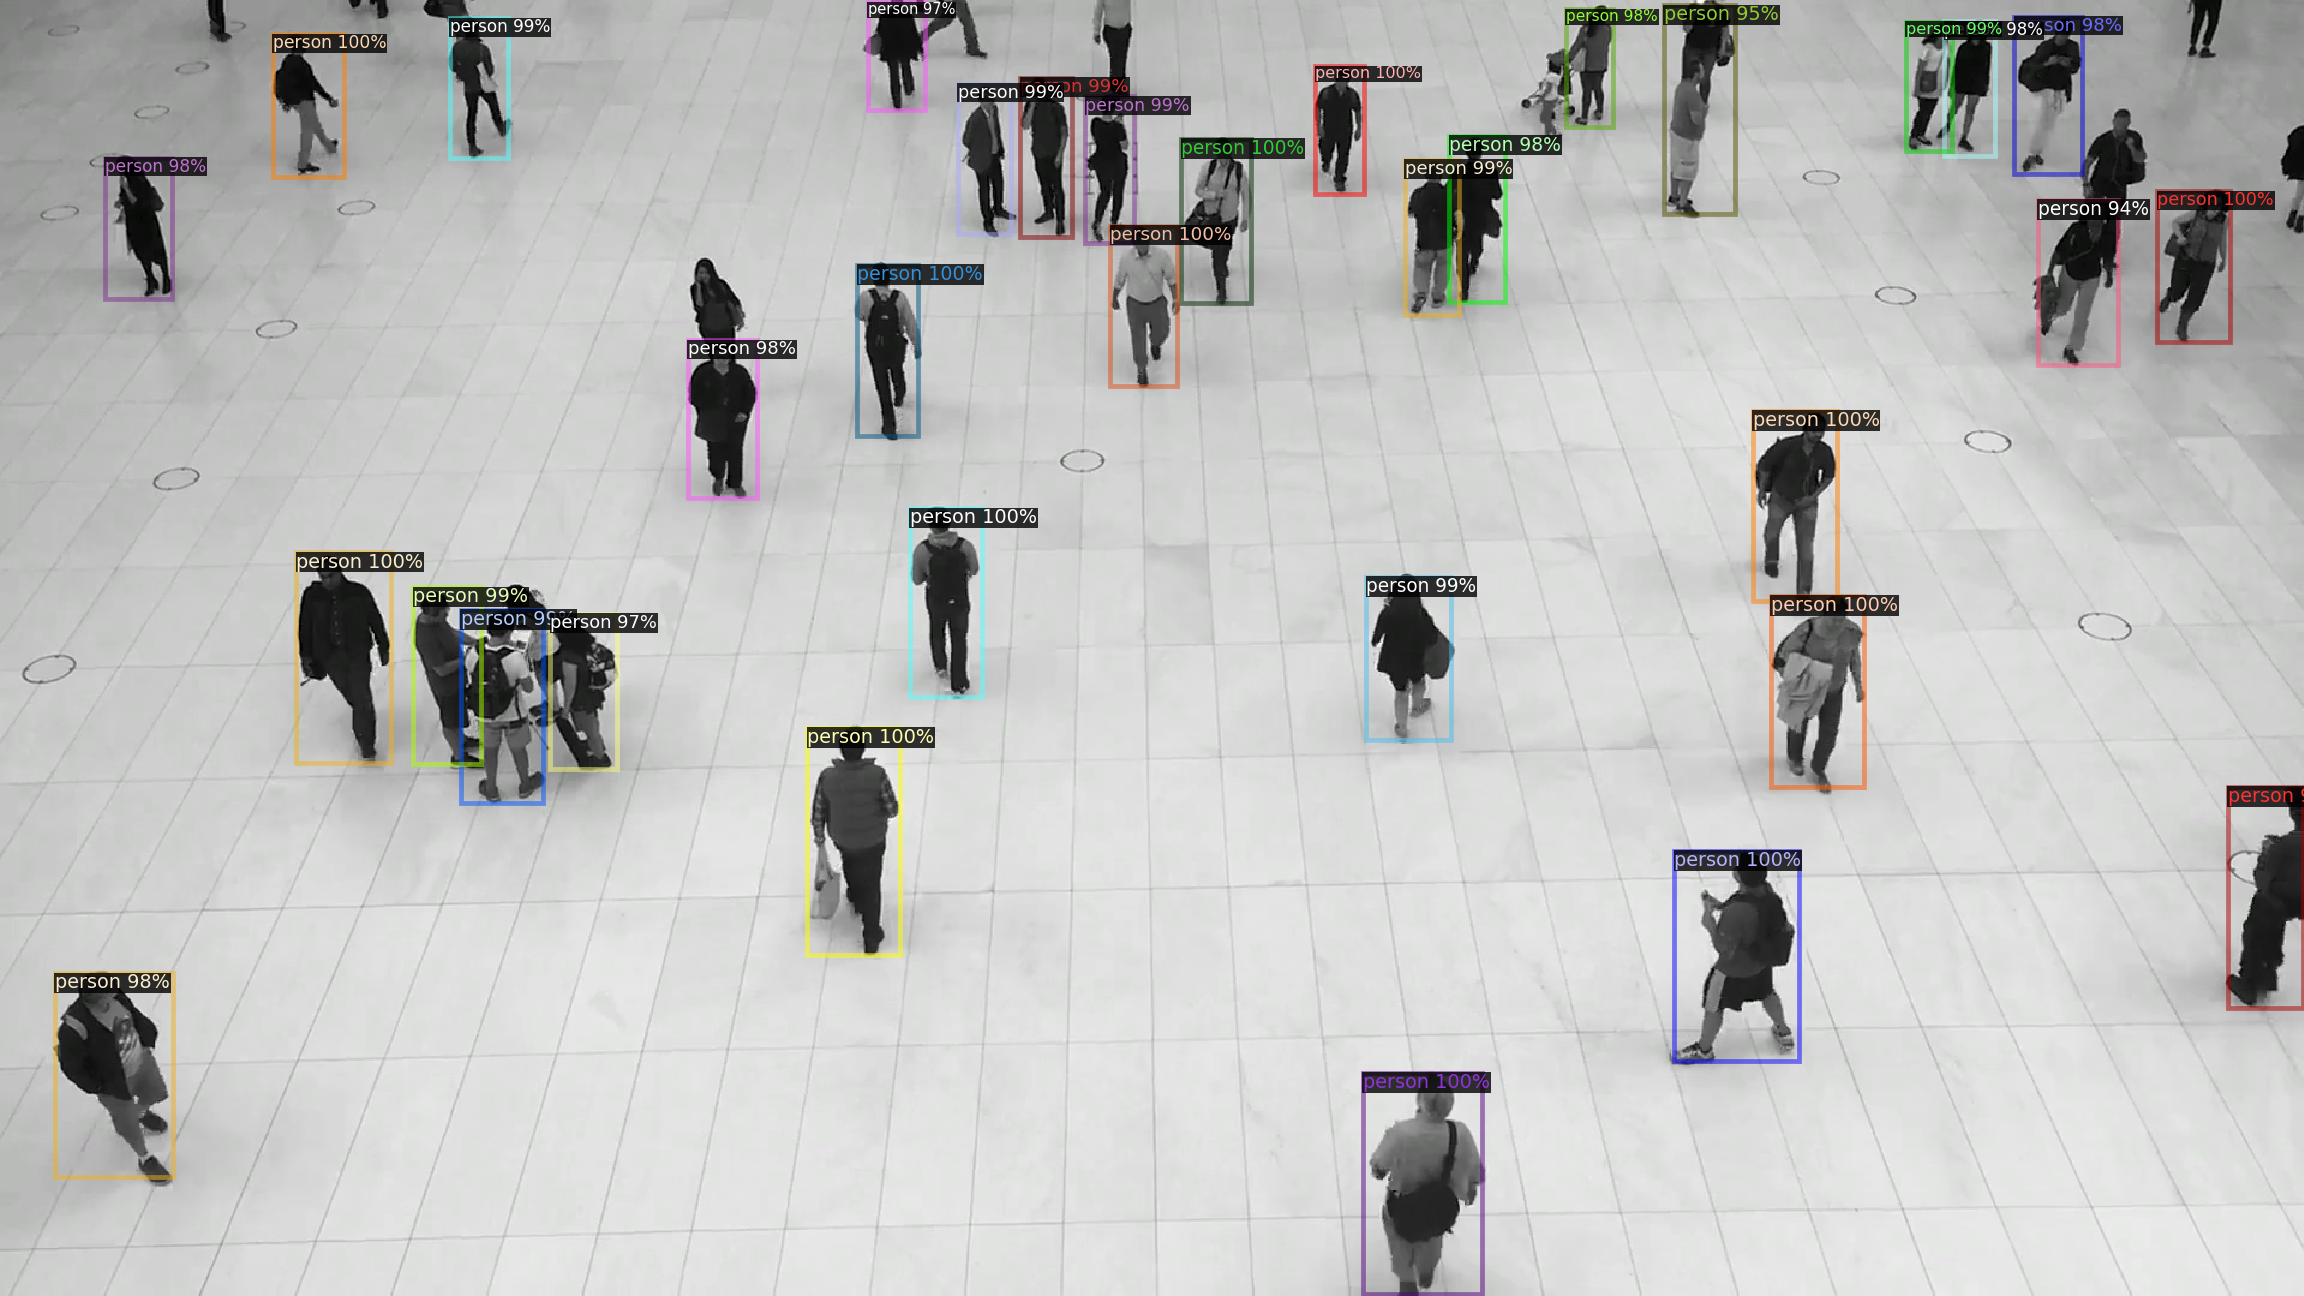

In [ ]:
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[ 246.9534     460.4195     325.71222    636.0018   ]
 [ 758.39294    423.68628    818.3087     580.90247  ]
 [1395.2379     709.3055    1499.2325     884.15643  ]
 [1460.4742     342.58322   1530.6844     500.5808   ]
 [1475.643      496.72      1553.5433     655.7234   ]
 [ 672.9049     606.5306     749.9912     795.47894  ]
 [ 714.4783     220.91052    764.8519     363.2207   ]
 [1135.8695     894.04877   1235.2285    1078.1677   ]
 [ 925.3041     188.47623    980.96576    321.99878  ]
 [1797.721      159.37427   1857.9678     284.62317  ]
 [1096.1674      55.203083  1136.4846     161.49374  ]
 [ 984.45056    115.72849   1042.0808     252.77362  ]
 [ 227.60217     28.67229    286.8616     147.42102  ]
 [1170.4547     133.15877   1216.102      262.41324  ]
 [1138.5715     480.80984   1208.9633     616.9038   ]
 [ 374.71613     15.25811    423.57425    131.70769  ]
 [ 383.9029     508.5281     452.27017    669.4252   ]
 [ 344.50516    489.54285    400.5471     636.66077  ]
 [1587.912

In [ ]:
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [ ]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

246.9534 460.4195 325.71222 636.0018


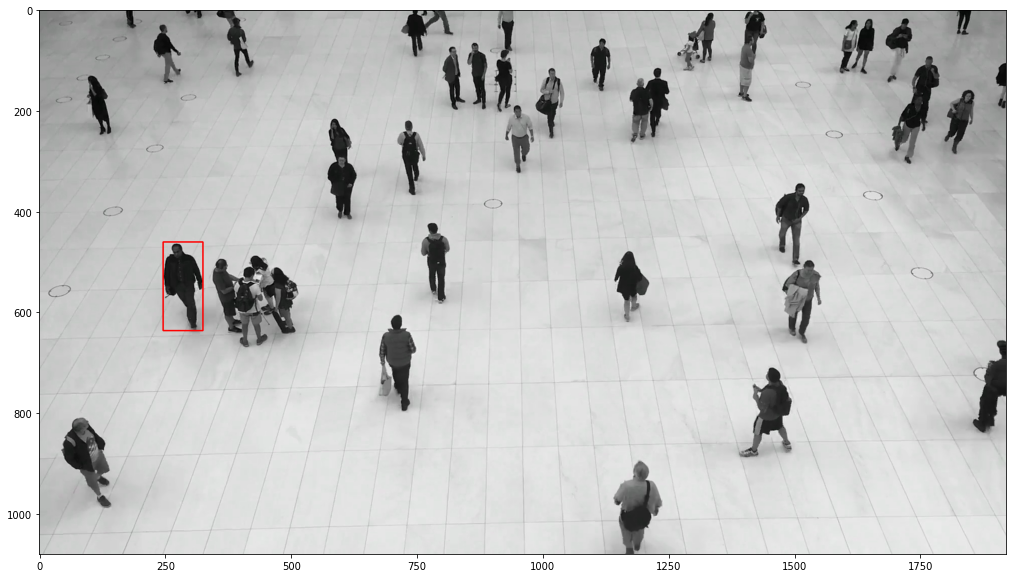

In [ ]:
img = cv2.imread('/content/drive/MyDrive/MiniProject/frames/7.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

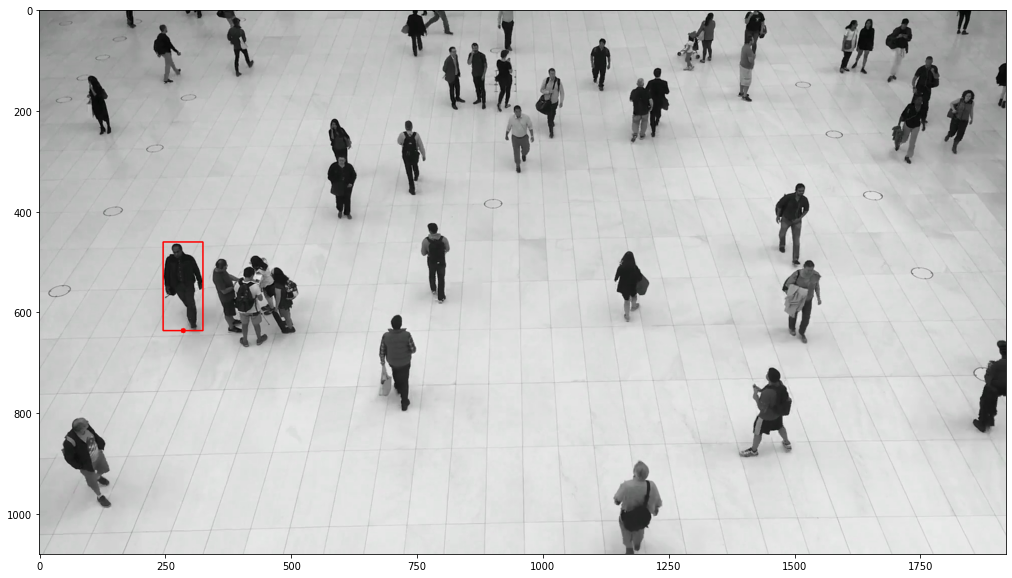

In [ ]:
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 255, 0), -1)
  cv2.putText(img,'p'+str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 2, cv2.LINE_AA)
  
  return mid

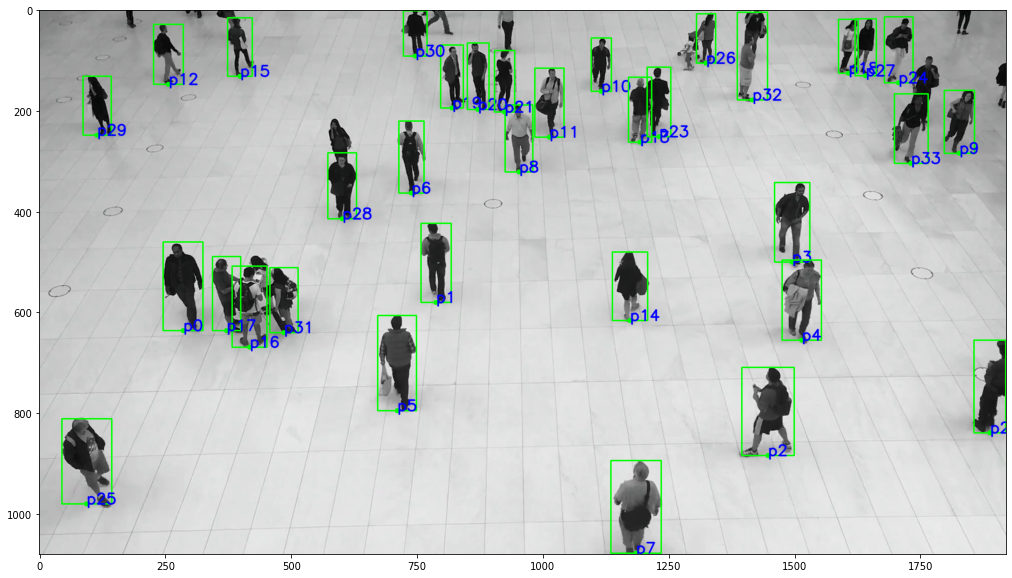

In [ ]:
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 47.7 ms, sys: 5.89 ms, total: 53.6 ms
Wall time: 59.1 ms


In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [ ]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist
0,0,17,86.000000
1,8,11,91.438504
2,9,33,98.061205
3,13,23,39.560081
4,16,17,56.612719
5,16,31,73.925638
6,18,27,34.365681
7,19,20,51.088159
8,20,21,53.235327
9,24,27,66.490601


In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 4)  
  return img

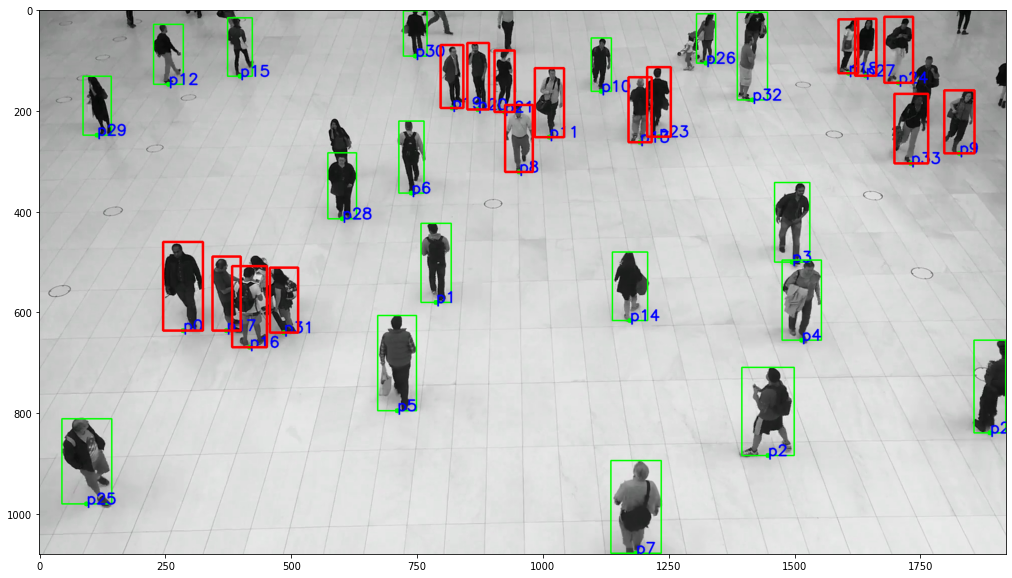

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
import os
import re

names=os.listdir('/content/drive/MyDrive/MiniProject/frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('/content/drive/MyDrive/MiniProject/frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('/content/drive/MyDrive/MiniProject/frames/'+name,img)
  return 0

In [ ]:
# from tqdm import tqdm
thresh=250
# temporary= [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]
for i in names:
  print(i)
  find_closest_people(i,thresh) 

0.png
1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.png
130.png
131.png
132.png
133.png
134.png
135.png
136.png
137.png
138.pn

In [ ]:
 
frames = os.listdir('/content/drive/MyDrive/MiniProject/frames/')
# frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    # print(frames[i])
    #reading each files
    img = cv2.imread('/content/drive/MyDrive/MiniProject/frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output122.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

error: ignored